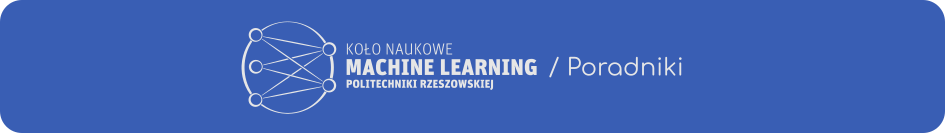

# YOLOv8 Śledzenie i zliczanie obiektów
[![](https://badges.aleen42.com/src/github.svg)](https://github.com/knmlprz/)
[![](https://badges.aleen42.com/src/discord.svg)](https://discord.com/invite/ZYJdXXgE6H)
[![](https://badges.aleen42.com/src/telegram.svg)](https://t.me/s/knmlprz)


## W tym notebooku dowiesz się jak

- Zainstalować YOLOv8
- Zainstalować Roboflow Supervision
- Jak zamienić film na serię klatek
- Jak uruchomić na nich model i tracker YOLOv8
- Jak narysować na klatce to co zwrócił model i tracker


### Zanim zaczniemy

Upewnijmy się, że mamy dostęp do GPU. Przyda się podczas trenowania modelu. 

> Jeżeli otrzymujesz komunikat: "NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running." Kliknij w ikonkę: 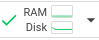 następnie wybierz `Change runtyme type` -> `Hardware accelerator` i zaznacz `GPU`.



In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

### Pobieranie plików video

Będziemy potrzebować dwóch plików:

- [rynek.mp4](https://drive.google.com/file/d/1xd_oTBlJR7LU5K3Sp8j7q8FFGZMN7v7_/view?usp=share_link)
- [politechinka.mp4](https://drive.google.com/file/d/1ccXc4UE-SRww334HdUdqQEwQ53Jq-7-i/view?usp=share_link)

In [ ]:
!pip install gdown

In [ ]:
%cd $HOME
import gdown

gdown.download("https://drive.google.com/file/d/1xd_oTBlJR7LU5K3Sp8j7q8FFGZMN7v7_/view?usp=share_link", 
               "rynek.mp4", quiet=False, fuzzy=True)
gdown.download("https://drive.google.com/file/d/1ccXc4UE-SRww334HdUdqQEwQ53Jq-7-i/view?usp=share_link", 
               "politechnika.mp4", quiet=False, fuzzy=True)

In [ ]:
RYNEK_VIDEO_PATH = f"{HOME}/rynek.mp4"
POLITECHNIKA_VIDEO_PATH = f"{HOME}/politechnika.mp4"

### Instalacja YOLOv8

In [ ]:
!pip install ultralytics==8.0.57
!pip install lap==0.4.0

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

### Instalacja supervision

In [ ]:
!pip install supervision==0.3.2

### Importowanie bibliotek 

In [ ]:
# Opencv
import cv2
from ultralytics import YOLO
import supervision as sv

### Wczytywanie klatek

In [ ]:
sv.VideoInfo.from_video_path(video_path=RYNEK_VIDEO_PATH)

In [ ]:
sv.VideoInfo.from_video_path(video_path=POLITECHNIKA_VIDEO_PATH)

In [ ]:
%matplotlib inline
for frame in sv.get_video_frames_generator(source_path=POLITECHNIKA_VIDEO_PATH):
  sv.show_frame_in_notebook(frame, (16, 16))
  break

### Rysowanie na klatce

## YOLOv8


In [ ]:
# Dostępne są modele:
# yolov8n.pt <- najmniejszy 
# yolov8s.pt
# yolov8m.pt
# yolov8l.pt
# yolov8x.pt <- największy

model = YOLO("yolov8m.pt")

### YOLO detect

https://docs.ultralytics.com/usage/cfg/

In [ ]:
model = YOLO("yolov8m.pt")
box_annotator = sv.BoxAnnotator(
    thickness=2,
    text_thickness=1,
    text_scale=0.5
)

for frame in sv.get_video_frames_generator(source_path=POLITECHNIKA_VIDEO_PATH):
  result = model(frame)[0]

  detections = sv.Detections.from_yolov8(result)
  frame = box_annotator.annotate(
      scene=frame,
      detections=detections
  )

  sv.show_frame_in_notebook(frame, (16, 16))
  break

## YOLOv8 Native tracking

Obiekt sv.Detections jest nakładką na to co zwraca model YOLO. Domyślnie obiekt ten nie posiada `tracker_id`. 

**Czym jest `tracker_id`?**

Jest identyfikatorem przypisanym do każdego wykrytego obiektu, który jest wykorzystywany do śledzenia tego obiektu w kolejnych ramkach wideo.

Jak wydobyć go z obiektu `results`?

https://docs.ultralytics.com/reference/results/#ultralytics.yolo.engine.results.Boxes

In [ ]:
help(sv.Detections)

In [ ]:
result.boxes

In [ ]:
result.boxes.id

#### Wydobywanie tracker_id (śledzenie)

### Zliczanie przejeżdżających samochodów

### Rysowanie trasy samochodów

In [ ]:
import numpy as np
tracker_lines = {}
for i, id in enumerate(tracker_id):
  if id in tracker_lines.keys():
    tracker_lines[id] = np.vstack((tracker_lines[id], xywh[i, 0:2]))
  else:
    tracker_lines[id] = xywh[i, 0:2]

# Referencje

- [YOLOv8 native tracking | Step-by-step tutorial | Tracking with Live Webcam Stream](https://www.youtube.com/watch?v=Mi9iHFd0_Bo&list=PLZCA39VpuaZZ1cjH4vEIdXIb0dCpZs3Y5&index=6) / Roboflow
- [Track & Count Objects using YOLOv8 ByteTrack & Supervision](https://www.youtube.com/watch?v=OS5qI9YBkfk) / Roboflow
- [Boxes API Reference](https://docs.ultralytics.com/reference/results/#boxes-api-reference)